In [69]:
from ray.tune.analysis import Analysis
from matplotlib import pyplot as plt
import plotly.express as px
import numpy as np

In [70]:
analysis = Analysis("/home/sergei/ray_results/adversarial_tune_fine")

In [71]:
target = 'policy_reward_mean/player_1'

In [72]:
df = analysis.dataframe(metric=target, mode='max')

In [73]:
df.iloc[0]

episode_reward_max                                                     7.15487
episode_reward_min                                                    -6.48552
episode_reward_mean                                                    3.36051
episode_len_mean                                                       163.288
episodes_this_iter                                                         438
                                                   ...                        
config/sgd_minibatch_size                                              6173.56
config/train_batch_size                                                70224.6
config/train_policies                                               [player_1]
config/train_steps                                                    99999999
logdir                       /home/sergei/ray_results/adversarial_tune_fine...
Name: 0, Length: 74, dtype: object

In [74]:
df.columns

Index(['episode_reward_max', 'episode_reward_min', 'episode_reward_mean',
       'episode_len_mean', 'episodes_this_iter', 'num_healthy_workers',
       'timesteps_total', 'done', 'episodes_total', 'training_iteration',
       'experiment_id', 'date', 'timestamp', 'time_this_iter_s',
       'time_total_s', 'pid', 'hostname', 'node_ip', 'time_since_restore',
       'timesteps_since_restore', 'iterations_since_restore',
       'checkpoint_rllib', 'trainer_iteration', 'trial_id', 'experiment_tag',
       'policy_reward_min/player_1', 'policy_reward_min/player_2',
       'policy_reward_max/player_1', 'policy_reward_max/player_2',
       'policy_reward_mean/player_1', 'policy_reward_mean/player_2',
       'hist_stats/episode_reward', 'hist_stats/episode_lengths',
       'hist_stats/policy_player_1_reward',
       'hist_stats/policy_player_2_reward', 'sampler_perf/mean_env_wait_ms',
       'sampler_perf/mean_processing_ms', 'sampler_perf/mean_inference_ms',
       'timers/sample_time_ms', 't

In [75]:
for k in df.columns:
#     if k.startswith('episode'):
#         del df[k]
    if not (k.startswith('config') or k == target or k == 'checkpoint_rllib' or k == 'logdir'):
        del df[k]

In [76]:
df = df.sort_values(target, ascending=False)

(array([1., 0., 3., 2., 1., 2., 2., 1., 2., 1.]),
 array([-8.85714286, -7.40308325, -5.94902364, -4.49496403, -3.04090442,
        -1.58684481, -0.1327852 ,  1.32127441,  2.77533402,  4.22939363,
         5.68345324]),
 <a list of 10 Patch objects>)

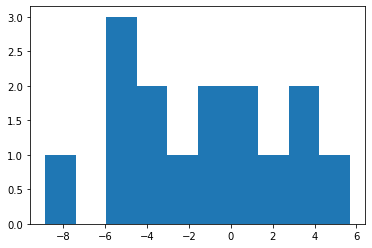

In [77]:
plt.hist(df[target])

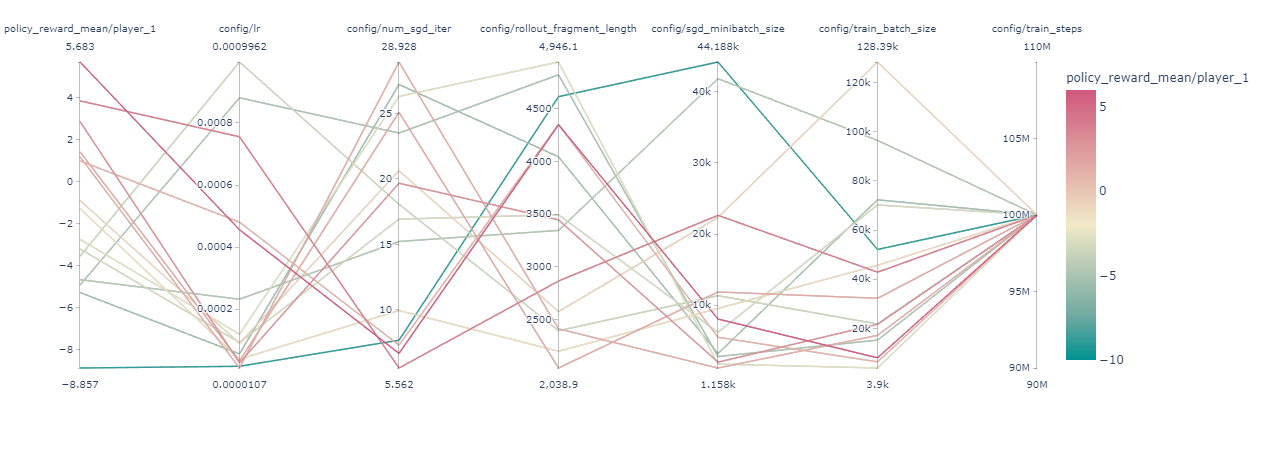

In [81]:
fig = px.parallel_coordinates(df, color=target,
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2, range_color=(-10, 6))
fig.show()

In [82]:
best_trial = df.iloc[0].logdir
df.iloc[0]

checkpoint_rllib                  /home/sergei/ray_results/PPO_YouShallNotPassHu...
policy_reward_mean/player_1                                                 5.68345
config/lr                                                               0.000455996
config/main_filename              /scratch/sergei/better-adversarial-defenses/yo...
config/num_sgd_iter                                                         6.68122
config/redis_address                                             128.32.175.10:6379
config/rollout_fragment_length                                              4350.34
config/sgd_minibatch_size                                                   8041.54
config/train_batch_size                                                     8046.43
config/train_policies                                                    [player_1]
config/train_steps                                                         99999999
logdir                            /home/sergei/ray_results/adversarial_tune_

In [83]:
df

,checkpoint_rllib,policy_reward_mean/player_1,config/lr,config/main_filename,config/num_sgd_iter,config/redis_address,config/rollout_fragment_length,config/sgd_minibatch_size,config/train_batch_size,config/train_policies,config/train_steps,logdir
9,/home/sergei/ray_results/PPO_YouShallNotPassHu...,5.683453,0.000456,/scratch/sergei/better-adversarial-defenses/yo...,6.681216,128.32.175.10:6379,4350.336182,8041.544873,8046.433100,[player_1],99999999,/home/sergei/ray_results/adversarial_tune_fine...
7,/home/sergei/ray_results/PPO_YouShallNotPassHu...,3.837209,0.000755,/scratch/sergei/better-adversarial-defenses/yo...,5.562134,128.32.175.10:6379,2865.445789,22627.467405,42879.762832,[player_1],99999999,/home/sergei/ray_results/adversarial_tune_fine...
12,/home/sergei/ray_results/PPO_YouShallNotPassHu...,2.857143,0.000027,/scratch/sergei/better-adversarial-defenses/yo...,19.670799,128.32.175.10:6379,3446.377219,1980.057337,21693.268099,[player_1],99999999,/home/sergei/ray_results/adversarial_tune_fine...
1,/home/sergei/ray_results/PPO_YouShallNotPassHu...,1.415929,0.000033,/scratch/sergei/better-adversarial-defenses/yo...,25.089852,128.32.175.10:6379,2038.906635,11850.547106,32255.177035,[player_1],99999999,/home/sergei/ray_results/adversarial_tune_fine...
5,/home/sergei/ray_results/PPO_YouShallNotPassHu...,1.176471,0.000011,/scratch/sergei/better-adversarial-defenses/yo...,28.927827,128.32.175.10:6379,2410.891170,1158.166947,17172.811368,[player_1],99999999,/home/sergei/ray_results/adversarial_tune_fine...
3,/home/sergei/ray_results/PPO_YouShallNotPassHu...,0.983607,0.000481,/scratch/sergei/better-adversarial-defenses/yo...,7.306473,128.32.175.10:6379,4352.367238,5480.487112,6411.628326,[player_1],99999999,/home/sergei/ray_results/adversarial_tune_fine...
14,/home/sergei/ray_results/PPO_YouShallNotPassHu...,-0.899001,0.000090,/scratch/sergei/better-adversarial-defenses/yo...,20.631147,128.32.175.10:6379,2574.840923,22335.162076,128388.832132,[player_1],99999999,/home/sergei/ray_results/adversarial_tune_fine...
8,/home/sergei/ray_results/PPO_YouShallNotPassHu...,-1.279070,0.000039,/scratch/sergei/better-adversarial-defenses/yo...,9.947342,128.32.175.10:6379,2198.059992,9531.807682,45689.262303,[player_1],99999999,/home/sergei/ray_results/adversarial_tune_fine...
13,/home/sergei/ray_results/PPO_YouShallNotPassHu...,-2.741935,0.000119,/scratch/sergei/better-adversarial-defenses/yo...,26.298221,128.32.175.10:6379,4946.096491,1707.837889,3900.229389,[player_1],99999999,/home/sergei/ray_results/adversarial_tune_fine...
0,/home/sergei/ray_results/PPO_YouShallNotPassHu...,-3.196347,0.000093,/scratch/sergei/better-adversarial-defenses/yo...,16.929951,128.32.175.10:6379,3495.092655,6173.560705,70224.558230,[player_1],99999999,/home/sergei/ray_results/adversarial_tune_fine...


2143


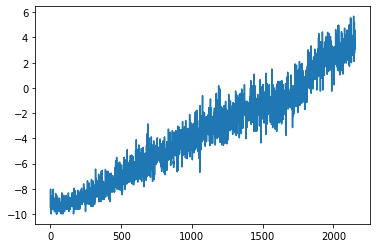

In [84]:
df_best = analysis.trial_dataframes[best_trial]
rew = df_best[target]
plt.plot(rew)
print(np.argmax(rew))

In [93]:
checkpoint = df_best.checkpoint_rllib.iloc[-2]
checkpoint

'/home/sergei/ray_results/PPO_YouShallNotPassHumans-v0_rllib_2020-08-10_05-58-07a4_u7hun/checkpoint_2151/checkpoint-2151'

In [110]:
!python youshallnotpass_rllib_adversarial_makevideo.py --checkpoint {checkpoint} --no_video=True --steps 50

2020-08-10 07:15:43,695	INFO resource_spec.py:212 -- Starting Ray with 125.54 GiB memory available for workers and up to 57.8 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-08-10 07:15:43,850	WARNING services.py:923 -- Redis failed to start, retrying now.
2020-08-10 07:15:44,173	WARNING services.py:923 -- Redis failed to start, retrying now.
2020-08-10 07:15:45,182	INFO services.py:1165 -- View the Ray dashboard at localhost:8266
Args: Namespace(checkpoint='/home/sergei/ray_results/PPO_YouShallNotPassHumans-v0_rllib_2020-08-10_05-58-07a4_u7hun/checkpoint_2151/checkpoint-2151', load_normal=False, no_video=True, steps=50)
Creating agent humanoid_blocker
Reading agent XML from: /scratch/sergei/better-adversarial-defenses/multiagent-competition/gym_compete/new_envs/assets/humanoid_body.xml
Creating agent humanoid
Reading agent XML from: /scratch/sergei/better-adversarial-defenses/multiagent-competition/gym_compete/new_envs/as

In [95]:
!export DISPLAY=:0; python youshallnotpass_rllib_adversarial_makevideo.py --checkpoint {checkpoint}

2020-08-10 06:36:46,621	INFO resource_spec.py:212 -- Starting Ray with 124.12 GiB memory available for workers and up to 57.19 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-08-10 06:36:46,781	WARNING services.py:923 -- Redis failed to start, retrying now.
2020-08-10 06:36:47,118	WARNING services.py:923 -- Redis failed to start, retrying now.
2020-08-10 06:36:47,766	INFO services.py:1165 -- View the Ray dashboard at localhost:8266
Args: Namespace(checkpoint='/home/sergei/ray_results/PPO_YouShallNotPassHumans-v0_rllib_2020-08-10_05-58-07a4_u7hun/checkpoint_2151/checkpoint-2151', load_normal=False, no_video=False, steps=10)
Creating agent humanoid_blocker
Reading agent XML from: /scratch/sergei/better-adversarial-defenses/multiagent-competition/gym_compete/new_envs/assets/humanoid_body.xml
Creating agent humanoid
Reading agent XML from: /scratch/sergei/better-adversarial-defenses/multiagent-competition/gym_compete/new_envs/

In [107]:
#video = _
video = "video-20200810-063659-906f9f6d-db0e-11ea-a969-1831bf455a80/video.000000.mp4"

In [109]:
from IPython.display import display, FileLink

local_file = FileLink(video, result_html_prefix="Click here to download: ")
display(local_file)

/scratch/sergei/better-adversarial-defenses/video-20200810-063659-906f9f6d-db0e-11ea-a969-1831bf455a80/video.000000.mp4

In [97]:
from IPython.display import HTML

HTML("""
    <video alt="test" controls>
        <source src="video-20200810-063659-906f9f6d-db0e-11ea-a969-1831bf455a80/video.000000.mp4" type="video/mp4">
    </video>
""")
